In [164]:
#importing necessary libraries
import numpy as np
import pandas as pd
from numpy import linalg as LA
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sb
import sys

# PCA 2 Components to 2 Components(PC1 and PC2)

### (2 Components to 1 Component .i.e only PC1 will be following after this one)

In [165]:
#Reading the given i/p CSV Dataset using pandas

data = pd.read_csv("Dataset.csv",header = None,prefix= 'Feature ')

# Visualization of given data

<AxesSubplot:title={'center':'Given Original Dataset'}, xlabel='Feature 0', ylabel='Feature 1'>

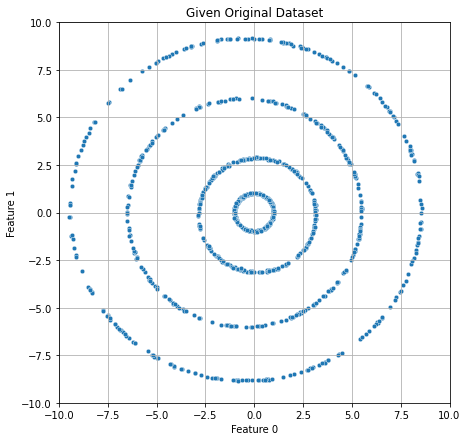

In [166]:
# The read data is in Dataframe form
# Let us plot and see the visualization of given data

final_df_p = pd.DataFrame(data.head(1000), columns = ['Feature 0','Feature 1'])
plt.figure(figsize = (7,7))
plt.title("Given Original Dataset")
plt.grid()
plt.xlim(-10, 10)
plt.ylim(-10, 10)
sb.scatterplot(data = final_df_p , x = 'Feature 0', y = 'Feature 1', s =20, palette= 'Accent')

In [167]:
# Converting the data into numpy

data_a = data.to_numpy()
data_a

array([[ 0.143  ,  0.98493],
       [-0.30467,  0.98562],
       [ 0.46625, -0.84003],
       ...,
       [ 6.1062 , -5.9864 ],
       [-7.4094 , -5.5205 ],
       [-0.12948, -8.8036 ]])

## Centering to its origin

In [168]:
# Centering dataset using the mean of the Dataset Columns
data_meaned = data - np.mean(data)
data_meaned

,Feature 0,Feature 1
0,0.14300,0.98493
1,-0.30467,0.98562
2,0.46625,-0.84003
3,0.94847,0.37222
4,-0.96871,-0.26697
...,...,...
995,4.48210,-7.40030
996,-3.49630,8.63860
997,6.10620,-5.98640
998,-7.40940,-5.52050


## Covariance, Eigen Values and Eigen Vectors

In [169]:
# Finding the covariance of the matrix

covariance_matrix  = np.cov(data_meaned , rowvar = False)
covariance_matrix

array([[14.7809367 ,  0.80966871],
       [ 0.80966871, 16.87223563]])

In [170]:
#Step-3

# Finding the Eigen Values and Eigen Vectors of the Matrix 

eigen_values , eigen_vectors = np.linalg.eigh(covariance_matrix)
print(eigen_values)
print(eigen_vectors)

[14.50410886 17.14906347]
[[-0.9462227  0.323516 ]
 [ 0.323516   0.9462227]]


In [171]:
#Step-4
# Should be sorted in descending diagonal order
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:,sorted_index]

print(sorted_index)
print(sorted_eigenvalue)
print(sorted_eigenvectors)
sorted_index

[1 0]
[17.14906347 14.50410886]
[[ 0.323516  -0.9462227]
 [ 0.9462227  0.323516 ]]


array([1, 0], dtype=int64)

In [172]:
#Step-5
n_components = 2
p_components_req = sorted_eigenvectors[:,0:n_components]

In [173]:
#Explained Variance
sum(sorted_eigenvalue[:n_components])/sum(sorted_eigenvalue)

1.0

In [174]:
#Step-6
projected_data = np.dot(p_components_req.transpose() , data_meaned.transpose() ).transpose()
projected_data

array([[ 0.97822557,  0.18333109],
       [ 0.83405005,  0.60714983],
       [-0.64401646, -0.71293917],
       ...,
       [-3.68901448, -7.71452094],
       [-7.62068223,  5.22497267],
       [-8.37205534, -2.72558827]])

In [175]:
#Downstreamed dataset
final_df = pd.DataFrame(projected_data, columns = ['Feature 0','Feature 1'])
#final_df = pd.concat([final_df , pd.DataFrame(label , columns = ['label'])] , axis = 1)
final_df

,Feature 0,Feature 1
0,0.978226,0.183331
1,0.834050,0.607150
2,-0.644016,-0.712939
3,0.659048,-0.777044
4,-0.566007,0.830247
...,...,...
995,-5.552301,-6.635180
996,7.042930,6.103004
997,-3.689014,-7.714521
998,-7.620682,5.224973


<AxesSubplot:title={'center':'PCA plot'}, xlabel='Feature 0', ylabel='Feature 1'>

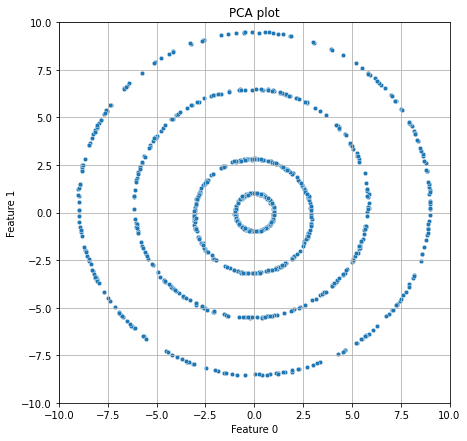

In [176]:
plt.figure(figsize = (7,7))
plt.grid()
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.title('PCA plot')
sb.scatterplot(data = final_df , x = 'Feature 0', y = 'Feature 1', s = 20 , palette= 'Accent')

## Variance for each PC1 and PC2

[54.2, 45.8]


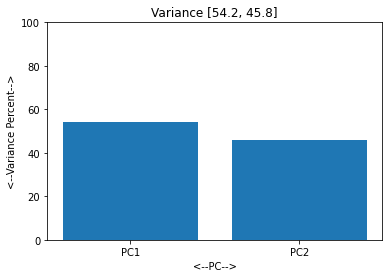

In [177]:
import math


#Explained Variance

n_ver = [np.round(sorted_eigenvalue[i]/sum(sorted_eigenvalue)*100,decimals = 1) for i in range(n_components)]

print(n_ver)
labels = ['PC' + str(x) for x in range(1,3)]
plt.bar(x =range(1,3), height = n_ver, tick_label = labels)
plt.xlim()
plt.ylim(0,100)
plt.title("Variance " + str(n_ver))
plt.ylabel('<--Variance Percent-->')
plt.xlabel('<--PC-->')
plt.show()

# PCA to convert 2D to 1D .i.e. only PC1

In [178]:
n_components = 1
p_components_req = sorted_eigenvectors[:,0:n_components]

In [179]:
#Explained Variance
sum(sorted_eigenvalue[:n_components])/sum(sorted_eigenvalue)

0.5417802452885223

In [180]:
#Step-6
projected_data = np.dot(p_components_req.transpose() , data_meaned.transpose() ).transpose()
projected_data

array([[ 9.78225568e-01],
       [ 8.34050052e-01],
       [-6.44016459e-01],
       [ 6.59047895e-01],
       [-5.66006605e-01],
       [ 1.03082808e+00],
       [-1.95545551e-01],
       [-7.00890776e-01],
       [ 3.46885749e-01],
       [ 7.04733400e-01],
       [-4.07092005e-01],
       [ 4.96868860e-01],
       [-9.26373572e-01],
       [ 6.06961499e-01],
       [ 8.47622419e-01],
       [ 6.28792463e-01],
       [-2.80644901e-01],
       [-7.97080557e-01],
       [ 2.59903065e-01],
       [-6.86538520e-01],
       [ 7.28140822e-02],
       [ 6.04388209e-01],
       [ 7.94238608e-01],
       [ 4.63316398e-01],
       [ 9.28544832e-01],
       [-5.14658674e-01],
       [ 1.01064794e+00],
       [-4.19855918e-01],
       [-5.92559143e-01],
       [-1.00169978e+00],
       [ 4.76042939e-03],
       [ 9.65272211e-01],
       [ 7.25839134e-01],
       [ 9.24565130e-01],
       [-9.03624578e-01],
       [-3.96287204e-01],
       [-5.38263177e-01],
       [ 3.04575657e-01],
       [-3.2

In [181]:
#Downstreamed dataset
final_df = pd.DataFrame(projected_data, columns = ['PC 1'])
#final_df = pd.concat([final_df , pd.DataFrame(label , columns = ['label'])] , axis = 1)
final_df

,PC 1
0,0.978226
1,0.834050
2,-0.644016
3,0.659048
4,-0.566007
...,...
995,-5.552301
996,7.042930
997,-3.689014
998,-7.620682


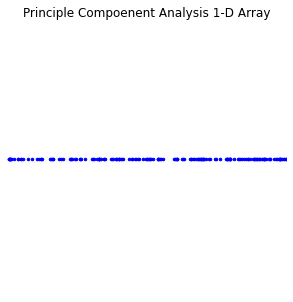

In [182]:
plt.figure(figsize = (5,5))
plt.hlines(0.001,0.002,1000)  # Draw a horizontal line
plt.xlim(0,1)
plt.ylim(0.5 ,1.5)
y = np.ones(np.shape(final_df))   # Make all y values the same
plt.title("Principle Compoenent Analysis 1-D Array")
plt.plot(final_df.head(1000),y[:1000],'.',color ='blue', ms = 5)  # Plot a line at each location specified in a
plt.axis('off')
plt.show()

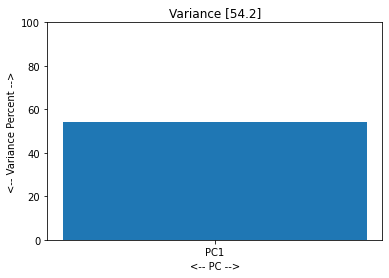

In [183]:
n_ver = [np.round(sorted_eigenvalue[i]/sum(sorted_eigenvalue)*100,decimals = 1) for i in range(n_components)]

labels = ['PC' + str(x) for x in range(1,n_components+1)]
plt.bar(x =range(1,n_components+1), height = n_ver, tick_label = labels)
plt.title("Variance " + str(n_ver))
plt.xlim()
plt.ylim(0,100)
plt.ylabel('<-- Variance Percent -->')
plt.xlabel('<-- PC -->')
plt.show()